<a href="https://colab.research.google.com/github/tomonari-masada/course2024-sml/blob/main/05_nearest_neighbors_2_(example).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k近傍法（続）
* 今回は、複数の特徴量を使って、k近傍法で予測をおこなう。

## 準備

### インポート

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

### データファイル

* `lifesat_extended.csv`をアップロードする。

In [90]:
from google.colab import files
files.upload()

Saving lifesat_extended.csv to lifesat_extended (1).csv


{'lifesat_extended (1).csv': b'Country,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita\nRussia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,11.0,4.0,70.2,6.0,1.7,20885.0,90.0,0.9,37.0,481.0,14.97,65.0,56.0,16.0,9054.914\nTurkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,21.0,8.1,74.6,5.6,2.37,16919.0,86.0,1.1,68.0,462.0,13.42,88.0,62.0,16.4,9437.372\nHungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,20.0,5.7,75.2,4.9,5.1,20948.0,87.0,1.1,57.0,487.0,15.04,62.0,77.0,17.6,

In [91]:
df = pd.read_csv("lifesat_extended.csv", index_col="Country")
df

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita
Country,,,,,,,,,,,,,,,,,,,,,
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,20885.0,90.0,0.9,37.0,481.0,14.97,65.0,56.0,16.0,9054.914
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,16919.0,86.0,1.1,68.0,462.0,13.42,88.0,62.0,16.4,9437.372
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,20948.0,87.0,1.1,57.0,487.0,15.04,62.0,77.0,17.6,12239.894
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,22655.0,91.0,1.1,58.0,521.0,14.20,55.0,79.0,18.4,12495.334
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,20307.0,90.0,1.1,66.0,472.0,14.99,59.0,81.0,16.3,15991.736
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5,17288.083
Greece,27.0,3.7,6.5,0.7,68.0,6.16,49.0,1.6,18575.0,14579.0,...,25503.0,83.0,1.2,74.0,466.0,14.91,64.0,69.0,18.6,18064.288
Portugal,18.0,5.7,6.5,0.9,38.0,9.62,61.0,1.1,20086.0,31245.0,...,23688.0,86.0,1.6,46.0,488.0,14.95,58.0,86.0,17.6,19121.592
Slovenia,26.0,3.9,10.3,0.5,85.0,5.63,63.0,0.4,19326.0,18465.0,...,32037.0,90.0,1.5,65.0,499.0,14.62,52.0,88.0,18.4,20732.482


* 日本をテストデータとして除外し、残りのデータ集合を使う。

In [92]:
df_train = df.drop(['Japan'])
df_test = df.loc[['Japan']]

In [93]:
df_train

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita
Country,,,,,,,,,,,,,,,,,,,,,
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,20885.0,90.0,0.9,37.0,481.0,14.97,65.0,56.0,16.0,9054.914
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,16919.0,86.0,1.1,68.0,462.0,13.42,88.0,62.0,16.4,9437.372
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,20948.0,87.0,1.1,57.0,487.0,15.04,62.0,77.0,17.6,12239.894
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,22655.0,91.0,1.1,58.0,521.0,14.20,55.0,79.0,18.4,12495.334
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,20307.0,90.0,1.1,66.0,472.0,14.99,59.0,81.0,16.3,15991.736
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5,17288.083
Greece,27.0,3.7,6.5,0.7,68.0,6.16,49.0,1.6,18575.0,14579.0,...,25503.0,83.0,1.2,74.0,466.0,14.91,64.0,69.0,18.6,18064.288
Portugal,18.0,5.7,6.5,0.9,38.0,9.62,61.0,1.1,20086.0,31245.0,...,23688.0,86.0,1.6,46.0,488.0,14.95,58.0,86.0,17.6,19121.592
Slovenia,26.0,3.9,10.3,0.5,85.0,5.63,63.0,0.4,19326.0,18465.0,...,32037.0,90.0,1.5,65.0,499.0,14.62,52.0,88.0,18.4,20732.482


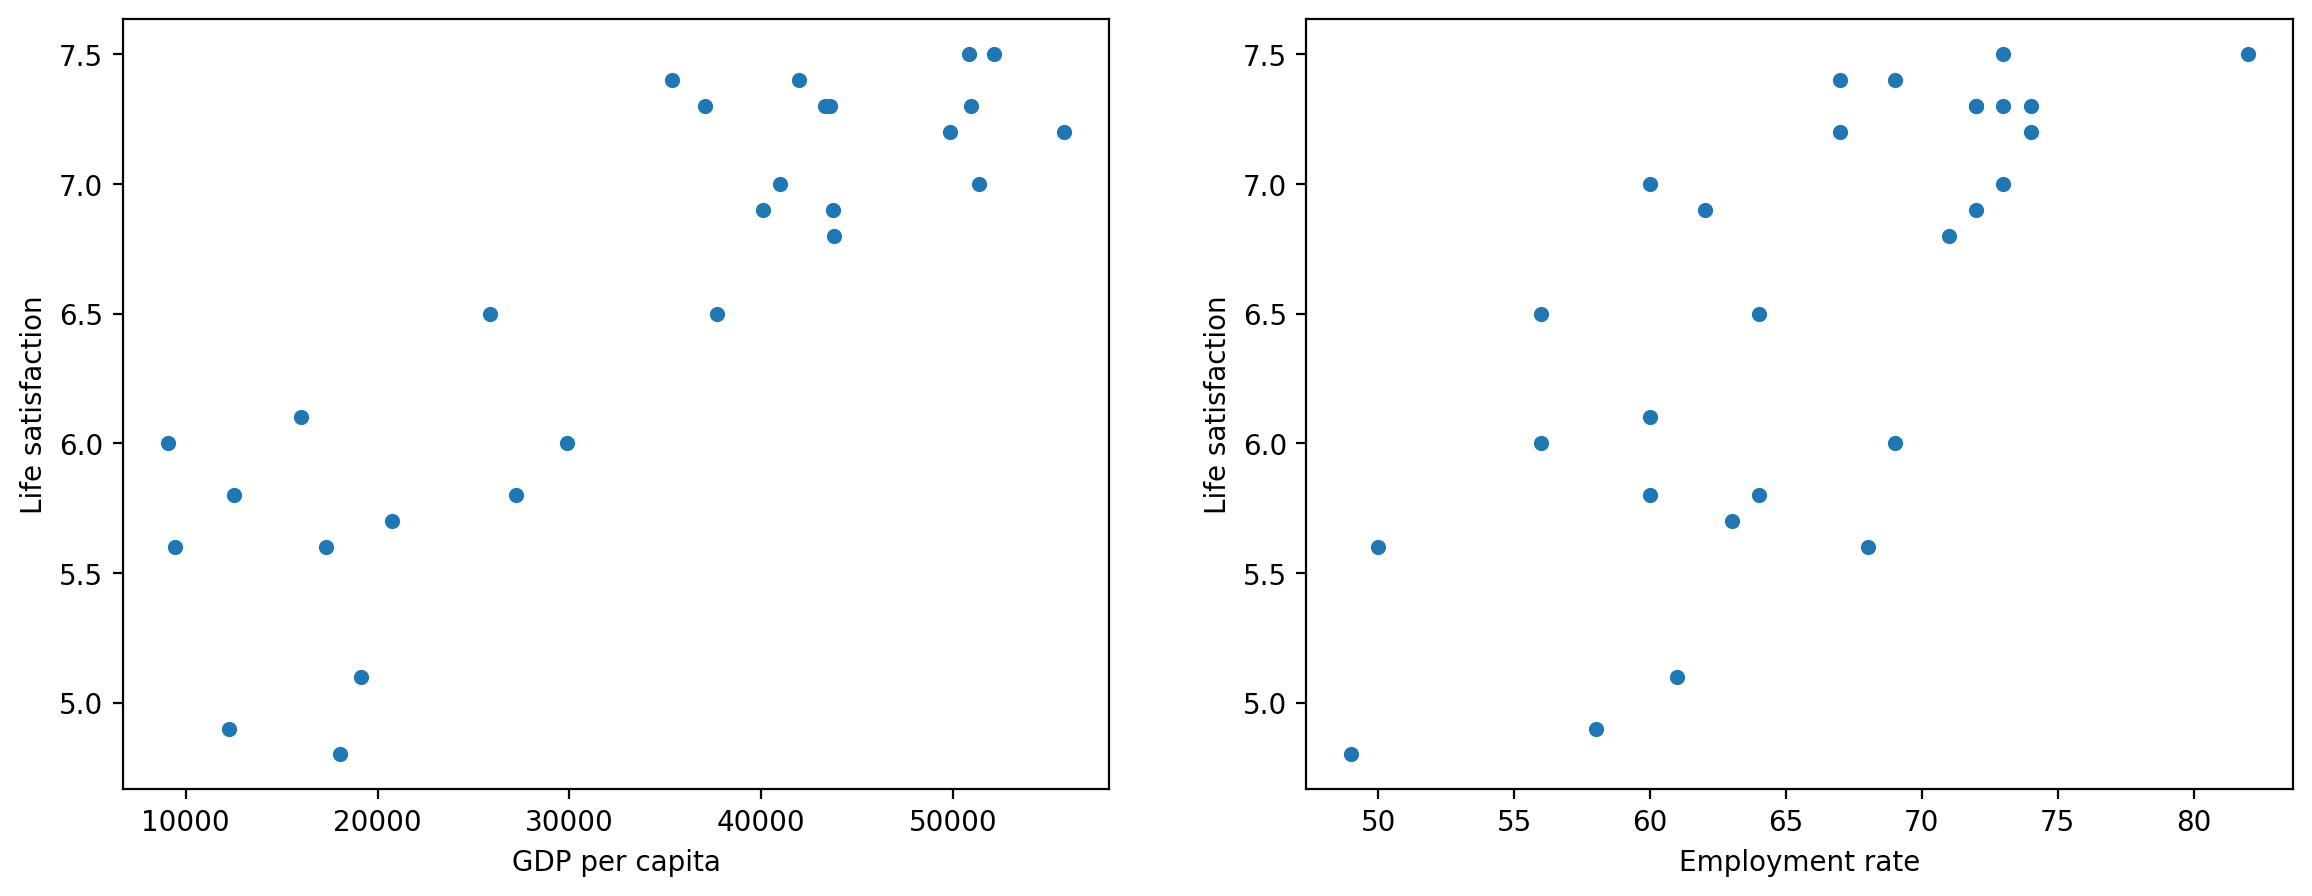

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df_train.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', ax=ax[0])
df_train.plot(kind='scatter', x='Employment rate', y='Life satisfaction', ax=ax[1]);

In [95]:
X = df_train[['GDP per capita', 'Employment rate']]
y = df_train['Life satisfaction']

In [96]:
X

,GDP per capita,Employment rate
Country,,
Russia,9054.914,69.0
Turkey,9437.372,50.0
Hungary,12239.894,58.0
Poland,12495.334,60.0
Slovak Republic,15991.736,60.0
Estonia,17288.083,68.0
Greece,18064.288,49.0
Portugal,19121.592,61.0
Slovenia,20732.482,63.0


## 今回の設定: 複数の特徴量を同時に使う
* 前回は、一人当たりのGDPと、雇用率を、別々に使った。
* 今回は、これら二つの特徴量を、同時に使いたい。
* つまり、(一人当たりのGDP, 雇用率)という2次元ベクトルを使って、生活満足度を予測したい。

### 演習問題1
* 韓国とイタリアの距離を、一人当たりのGDPと雇用率を同時に使って計算したい。
* しかし、下に示す距離の計算方法には、問題がある。どのような問題があるか。

In [97]:
print(np.linalg.norm(X.loc['Korea'] - X.loc['Italy']))

2671.395978782627


### 演習問題2
* 上で見つけた問題を解決した上で、あらためて、韓国とイタリアの距離を求めてみよう。

## 訓練データ/検証データ/テストデータ


### テストデータ (test set)
* 最終的にそれについて予測を行なうことで、手法の評価をおこないたいデータを、テストデータと呼ぶ。
* よって、今回は、日本のデータが、テストデータになる。
 * 普通は、テストデータは今回のように一つだけではなく、複数、用意する。
 * 今回は、データ数そのものが29個と少ないため、テストデータは一つだけにしている。

### 検証データ (validation set)

* 最適な近傍の個数kを、どうやって求めたらいいだろうか。
* kの値を変えながら、日本の生活満足度を予測しつつ・・・
* その日本の予測誤差を見ながらkを決めるのでは、カンニングしていることになる。
 * テストデータでの評価は、最終評価なので、最後に一度行うだけ。
 * つまり、テストデータについては、答えが分かっていないと想定する。
* 日本の生活満足度を予測する前に、どのようにしてkを決めればいいだろうか。


* そこで、テストデータ以外のデータを使って、予測問題を解き、評価する。

* テストデータ以外のデータの中から、国を一つ選んで（例えば韓国）、その国について予測をしてみる。
* k近傍法の場合のkのように、チューニングしなければならないハイパーパラメータを決めるために使うデータを、検証データと呼ぶ。
 * 本当にそれについて予測をしたいデータは、テストデータ。
 * 検証(validation)のためにそれについて予測をおこなうデータが、検証データ。
* 検証データについて予測を行うことで、kの値を変えたとき予測性能がどう変わるか、調べる。
 * 検証データも、普通は、複数個用意する。
 * 今回は、データ数そのものが少ないため、検証データも一つだけにしている。


### 訓練データ (training set)
* 予測を実行するための手掛かりとする使うデータ集合を、訓練データと呼ぶ。
* k近傍法では、その中から特定の国の近傍をk個見つけてくるデータ集合が、訓練データになる。

## 最適なkの決定
* ここでは、韓国を検証データとして使う。
 * 日本はテストデータなので、最初に除外しておいた。
* そして、韓国の生活満足度を予測し、最も良い予測値を与えるkがいくらか、調べる。

### 演習問題3
* 韓国の生活満足度を予測し、最も良い予測値を与えるkを調べよう。

In [98]:
val_set = ['Korea']
X_train = X.drop(val_set)
y_train = y.drop(val_set)
X_val = X.loc[val_set]
y_val = y.loc[val_set]

In [99]:
X_train.columns

Index(['GDP per capita', 'Employment rate'], dtype='object')

In [100]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = X_train.copy()
X_train_scaled[X_train.columns] = scaler.transform(X_train)
X_val_scaled = X_val.copy()
X_val_scaled[X_val.columns] = scaler.transform(X_val)

In [101]:
sorted_countries = ((X_train_scaled - X_val_scaled.squeeze()) ** 2).sum(1).sort_values().index
sorted_countries

Index(['Slovenia', 'Portugal', 'Israel', 'France', 'Spain', 'Estonia', 'Italy',
       'Slovak Republic', 'Belgium', 'Poland', 'New Zealand', 'Finland',
       'Hungary', 'Germany', 'United Kingdom', 'Russia', 'Canada', 'Austria',
       'Netherlands', 'Greece', 'Ireland', 'Australia', 'Turkey', 'Sweden',
       'Denmark', 'United States', 'Iceland'],
      dtype='object', name='Country')

In [102]:
np.arange(len(sorted_countries)) + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [103]:
predictions = y_train[sorted_countries].cumsum() / (np.arange(len(sorted_countries)) + 1)

In [104]:
(predictions - y_val.values).abs().argmin() + 1

1

## 交差検証 (cross-validation)
* 検証データの取り方を何通りも変えつつ予測手法の評価を繰り返すことで・・・
* 手法の性能を検証することを交差検証と呼ぶ。

## leave-one-out交差検証 (1)
* 上では、韓国を検証データとして使った。
* しかし、韓国以外の国を検証データとしても構わないはずである。
* そこで、日本以外の国の一つ一つを検証データとした場合の、それぞれ最適なkの値を求めてみる。
  * 検証データが1個の場合の交差検証を、leave-one-out交差検証と呼ぶ。

### 演習問題4
* 韓国について行ったことと同じことを、他の国についても実行し・・・
* 最適なkの値がどのくらい違ってくるか、調べてみよう。

In [105]:
X.index

Index(['Russia', 'Turkey', 'Hungary', 'Poland', 'Slovak Republic', 'Estonia',
       'Greece', 'Portugal', 'Slovenia', 'Spain', 'Korea', 'Italy', 'Israel',
       'New Zealand', 'France', 'Belgium', 'Germany', 'Finland', 'Canada',
       'Netherlands', 'Austria', 'United Kingdom', 'Sweden', 'Iceland',
       'Australia', 'Ireland', 'Denmark', 'United States'],
      dtype='object', name='Country')

In [106]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

for country in X.index:
  val_set = [country]
  X_train = X.drop(val_set)
  y_train = y.drop(val_set)
  X_val = X.loc[val_set]
  y_val = y.loc[val_set]

  scaler = MinMaxScaler()
  #scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = X_train.copy()
  X_train_scaled[X_train.columns] = scaler.transform(X_train)
  X_val_scaled = X_val.copy()
  X_val_scaled[X_val.columns] = scaler.transform(X_val)

  sorted_countries = ((X_train_scaled - X_val_scaled.squeeze()) ** 2).sum(1).sort_values().index
  predictions = y_train[sorted_countries].cumsum() / (np.arange(len(sorted_countries)) + 1)
  best_k = (predictions - y_val.values).abs().argmin() + 1
  print(country, best_k)

Russia 15
Turkey 8
Hungary 8
Poland 12
Slovak Republic 16
Estonia 3
Greece 1
Portugal 4
Slovenia 7
Spain 27
Korea 1
Italy 5
Israel 4
New Zealand 3
France 27
Belgium 18
Germany 17
Finland 7
Canada 10
Netherlands 11
Austria 19
United Kingdom 21
Sweden 8
Iceland 3
Australia 2
Ireland 4
Denmark 1
United States 9


* 最適なkを、どのようにして決めればいいだろうか？
 * 例えば、各国について得られたkの平均をとることが考えられるが、これは良い方法と言えるだろうか？

## leave-one-out交差検証 (2)
* 上では、テストデータである日本を除く国を、一つずつ順番に検証データとして、最適なkを求めた。
* しかし、こうして国ごとに求められたkを、どうやってまとめあげるのか、疑問が残った。
 * それらkの平均をとる、という方法は、何かおかしい感じがする。
 * 最頻値の方が、まだましであろう。
* 最適なkを決める、もっと良い方法はないだろうか？

### 演習問題5
* 韓国を検証データとする。つまり、韓国について予測を行なう。k=1から27まで変えたとき、それぞれ予測誤差がいくらになるか、求めてみよう。

### 演習問題6
* 縦が国名、横がkの値の表を、データフレームとして作った上で・・・
* 日本を除く28カ国の一つ一つを検証データとして評価していくことで・・・
* 各々のkの値で予測誤差がいくらになるかで、表を埋めてみよう。

In [107]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

errors = {}
for country in X.index:
  val_set = [country]
  X_train = X.drop(val_set)
  y_train = y.drop(val_set)
  X_val = X.loc[val_set]
  y_val = y.loc[val_set]

  scaler = MinMaxScaler()
  #scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = X_train.copy()
  X_train_scaled[X_train.columns] = scaler.transform(X_train)
  X_val_scaled = X_val.copy()
  X_val_scaled[X_val.columns] = scaler.transform(X_val)

  sorted_countries = ((X_train_scaled - X_val_scaled.squeeze()) ** 2).sum(1).sort_values().index
  predictions = y_train[sorted_countries].cumsum() / (np.arange(len(sorted_countries)) + 1)
  errors[country] = (predictions - y_val.values).abs().values

In [108]:
df_errors = pd.DataFrame.from_dict(errors)

In [109]:
df_errors

,Russia,Turkey,Hungary,Poland,Slovak Republic,Estonia,Greece,Portugal,Slovenia,Spain,...,Canada,Netherlands,Austria,United Kingdom,Sweden,Iceland,Australia,Ireland,Denmark,United States
0,0.400000,0.800000,0.900000,0.900000,1.000000,1.000000e-01,0.800000,0.600000,0.600000,0.500000,...,0.400000,0.400000,0.400000,0.100000,0.300000,0.300000,0.200000,0.200000,0.200000,0.100000
1,0.300000,0.750000,1.050000,0.300000,0.650000,2.500000e-01,1.250000,0.800000,0.100000,0.950000,...,0.450000,0.200000,0.150000,0.300000,0.200000,0.250000,0.050000,0.050000,0.250000,0.200000
2,0.300000,0.433333,0.766667,0.433333,0.833333,8.881784e-16,0.866667,0.766667,0.033333,0.900000,...,0.400000,0.233333,0.233333,0.400000,0.166667,0.166667,0.100000,0.133333,0.366667,0.066667
3,0.200000,0.200000,0.775000,0.350000,0.725000,1.250000e-01,0.950000,0.525000,0.050000,0.775000,...,0.300000,0.300000,0.200000,0.350000,0.050000,0.175000,0.200000,0.000000,0.325000,0.050000
4,0.340000,0.260000,0.760000,0.320000,0.500000,1.400000e-01,1.020000,0.560000,0.020000,0.760000,...,0.220000,0.260000,0.260000,0.380000,0.060000,0.240000,0.160000,0.060000,0.400000,0.040000
5,0.466667,0.066667,0.900000,0.233333,0.500000,1.500000e-01,1.016667,0.700000,0.150000,0.916667,...,0.183333,0.216667,0.266667,0.400000,0.016667,0.300000,0.133333,0.016667,0.366667,0.083333
6,0.428571,0.042857,0.757143,0.228571,0.471429,2.857143e-02,0.914286,0.671429,0.014286,1.014286,...,0.171429,0.171429,0.285714,0.414286,0.042857,0.285714,0.128571,0.085714,0.357143,0.042857
7,0.312500,0.012500,0.750000,0.112500,0.425000,2.500000e-01,0.912500,0.700000,0.025000,0.975000,...,0.150000,0.150000,0.300000,0.412500,0.012500,0.337500,0.100000,0.062500,0.375000,0.025000
8,0.122222,0.033333,0.788889,0.100000,0.388889,3.222222e-01,0.922222,0.722222,0.055556,0.866667,...,0.111111,0.111111,0.333333,0.444444,0.022222,0.322222,0.122222,0.088889,0.344444,0.011111
9,0.150000,0.030000,0.800000,0.190000,0.400000,4.600000e-01,0.910000,0.620000,0.220000,0.740000,...,0.090000,0.090000,0.350000,0.460000,0.020000,0.300000,0.110000,0.120000,0.310000,0.030000


### 演習問題7
* 上で作った表で、それぞれのkの値について、予測誤差の平均値を求めてみよう。

In [110]:
df_errors.mean(1)

0     0.453571
1     0.392857
2     0.361905
3     0.313393
4     0.319286
5     0.330952
6     0.314286
7     0.309375
8     0.305952
9     0.303571
10    0.312013
11    0.322619
12    0.323352
13    0.333929
14    0.357857
15    0.394643
16    0.427941
17    0.454365
18    0.486278
19    0.516250
20    0.553741
21    0.582630
22    0.609472
23    0.647024
24    0.689143
25    0.731181
26    0.761905
dtype: float64

### 演習問題8
* 上で求めた予測誤差の平均値を、最も小さくするkの値は？

In [111]:
best_k = df_errors.mean(1).idxmin() + 1
print(best_k)

10


### 演習問題9
* こうして求めた最適なkを使って、最終的に、日本の生活満足度の予測をしてみよう。
  * ここで初めてテストデータを使う。

In [112]:
X = df[['GDP per capita', 'Employment rate']]
y = df['Life satisfaction']

country = "Japan"
test_set = [country]
X_train = X.drop(test_set)
y_train = y.drop(test_set)
X_test = X.loc[test_set]
y_test = y.loc[test_set]

In [113]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = X_train.copy()
X_train_scaled[X_train.columns] = scaler.transform(X_train)
X_test_scaled = X_test.copy()
X_test_scaled[X_test.columns] = scaler.transform(X_test)

In [114]:
sorted_countries = ((X_train_scaled - X_test_scaled.squeeze()) ** 2).sum(1).sort_values().index
predictions = y_train[sorted_countries].cumsum() / (np.arange(len(sorted_countries)) + 1)

In [115]:
prediction = predictions.values[best_k - 1]
print(prediction)

6.969999999999999


In [116]:
np.abs(prediction - y_test.values[0])

1.0699999999999985

# 課題
* 上のnotebookを最後まで実践することが、今回の課題です。